# COVID-19 Data Analysis  

**Dataset sources:**  
- full_grouped.csv  
- usa_county_wise.csv 
- worldometer_data.csv  

**Link:**  https://www.kaggle.com/datasets/imdevskp/corona-virus-report

**Problem Statement:** 

The COVID-19 pandemic has had a profound global impact, with varying effects across countries and over time. To inform public health decisions, it is critical to analyze country-level and global data for patterns, anomalies, and correlations.

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Data Quality Checking & Wrangling / Cleaning:


**Schema Preview**  


In [38]:
full_grouped=pd.read_csv("full_grouped.csv")
full_grouped.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [39]:
usa_county_wise = pd.read_csv("usa_county_wise.csv")
usa_county_wise.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",1/22/20,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",1/22/20,0,0
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",1/22/20,0,0
3,63072001,PR,PRI,630,72001.0,Adjuntas,Puerto Rico,US,18.180117,-66.754367,"Adjuntas, Puerto Rico, US",1/22/20,0,0
4,63072003,PR,PRI,630,72003.0,Aguada,Puerto Rico,US,18.360255,-67.175131,"Aguada, Puerto Rico, US",1/22/20,0,0


In [40]:
worldometer_data = pd.read_csv("worldometer_data.csv")
worldometer_data.head()


,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


 **Missing Values, Duplicates, Outliers, Type Checks, Sanity Checks**

In [41]:
full_grouped.duplicated().sum()

np.int64(0)

In [42]:
full_grouped.info()
full_grouped.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
count,3.515600e+04,35156.000000,3.515600e+04,3.515600e+04,35156.00000,35156.000000,35156.000000
mean,2.356663e+04,1234.068239,1.104813e+04,1.128443e+04,469.36375,18.603339,269.315593
std,1.499818e+05,7437.238354,6.454640e+04,8.997149e+04,3005.86754,115.706351,2068.063852
min,0.000000e+00,0.000000,0.000000e+00,-2.000000e+00,0.00000,-1918.000000,-16298.000000
25%,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000
50%,2.500000e+02,4.000000,3.300000e+01,8.500000e+01,2.00000,0.000000,0.000000
75%,3.640250e+03,78.250000,1.286250e+03,1.454000e+03,75.00000,1.000000,20.000000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,77255.00000,3887.000000,140050.000000


In [43]:
neg_rows = full_grouped[(full_grouped.select_dtypes(include='number') < 0).any(axis=1)]
print(neg_rows)


             Date    Country/Region  Confirmed  Deaths  Recovered  Active  \
6256   2020-02-24             Italy        229       7          1     221   
8757   2020-03-08       South Korea       7314      50        118    7146   
9540   2020-03-13           Andorra          1       0          0       1   
9963   2020-03-15             Egypt        110       2         21      87   
10176  2020-03-16           Iceland        180       0          0     180   
...           ...               ...        ...     ...        ...     ...   
33856  2020-07-21           Austria      19827     710      17716    1401   
33908  2020-07-21            France     214607   30168      79861  104578   
34021  2020-07-21            Uganda       1072       0        958     114   
34134  2020-07-22     Liechtenstein         86       1         81       4   
34164  2020-07-22  Papua New Guinea         30       0          8      22   

       New cases  New deaths  New recovered             WHO Region  
6256  

In [44]:
neg_counts = (full_grouped.select_dtypes(include='number') < 0).sum()
print(neg_counts)

Confirmed         0
Deaths            0
Recovered         0
Active            2
New cases         0
New deaths       38
New recovered    77
dtype: int64


**Negative rows less than 0.3% of entire dataset**
*So I will remove them*

In [45]:
full_grouped_cleaned = full_grouped[(full_grouped.select_dtypes(include='number') >= 0).all(axis=1)]
full_grouped_cleaned.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
count,3.504100e+04,35041.000000,3.504100e+04,3.504100e+04,35041.000000,35041.000000,35041.000000
mean,2.351692e+04,1227.798493,1.103168e+04,1.125744e+04,469.348906,18.590508,271.163808
std,1.500045e+05,7423.438095,6.459747e+04,8.992780e+04,3008.153287,114.807722,2067.557128
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,2.460000e+02,4.000000,3.300000e+01,8.400000e+01,2.000000,0.000000,0.000000
75%,3.623000e+03,78.000000,1.279000e+03,1.454000e+03,74.000000,1.000000,20.000000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,77255.000000,3887.000000,140050.000000


In [46]:
usa_county_wise.duplicated().sum()

np.int64(0)

In [47]:
usa_county_wise.info()
usa_county_wise.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627920 entries, 0 to 627919
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   UID             627920 non-null  int64  
 1   iso2            627920 non-null  object 
 2   iso3            627920 non-null  object 
 3   code3           627920 non-null  int64  
 4   FIPS            626040 non-null  float64
 5   Admin2          626792 non-null  object 
 6   Province_State  627920 non-null  object 
 7   Country_Region  627920 non-null  object 
 8   Lat             627920 non-null  float64
 9   Long_           627920 non-null  float64
 10  Combined_Key    627920 non-null  object 
 11  Date            627920 non-null  object 
 12  Confirmed       627920 non-null  int64  
 13  Deaths          627920 non-null  int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 67.1+ MB


,UID,code3,FIPS,Lat,Long_,Confirmed,Deaths
count,6.279200e+05,627920.000000,626040.000000,627920.000000,627920.000000,627920.000000,627920.000000
mean,8.342958e+07,834.491617,33061.684685,36.707212,-88.601474,357.284285,17.536328
std,4.314702e+06,36.492620,18636.156825,9.061572,21.715747,3487.282694,300.991466
min,1.600000e+01,16.000000,60.000000,-14.271000,-174.159600,0.000000,0.000000
25%,8.401811e+07,840.000000,19079.000000,33.895587,-97.790204,0.000000,0.000000
50%,8.402921e+07,840.000000,31014.000000,38.002344,-89.486710,4.000000,0.000000
75%,8.404612e+07,840.000000,47131.000000,41.573069,-82.311265,63.000000,1.000000
max,8.410000e+07,850.000000,99999.000000,69.314792,145.673900,224051.000000,23500.000000


**Null rows less than 0.3% of entire dataset**

**And they are about non states of usa like island and they are out of scope of my intersts**

*So I will remove them*

In [48]:
usa_county_wise_cleaned = usa_county_wise.dropna()
usa_county_wise_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 624912 entries, 3 to 627908
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   UID             624912 non-null  int64  
 1   iso2            624912 non-null  object 
 2   iso3            624912 non-null  object 
 3   code3           624912 non-null  int64  
 4   FIPS            624912 non-null  float64
 5   Admin2          624912 non-null  object 
 6   Province_State  624912 non-null  object 
 7   Country_Region  624912 non-null  object 
 8   Lat             624912 non-null  float64
 9   Long_           624912 non-null  float64
 10  Combined_Key    624912 non-null  object 
 11  Date            624912 non-null  object 
 12  Confirmed       624912 non-null  int64  
 13  Deaths          624912 non-null  int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 71.5+ MB


In [49]:
worldometer_data.duplicated().sum()

np.int64(0)

In [50]:
worldometer_data.info()
worldometer_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
count,2.080000e+02,2.090000e+02,4.000000,188.000000,3.000000,2.050000e+02,3.000000,2.050000e+02,122.000000,208.000000,187.000000,1.910000e+02,191.000000
mean,3.041549e+07,9.171850e+04,1980.500000,3792.590426,300.000000,5.887898e+04,1706.000000,2.766433e+04,534.393443,3196.024038,98.681176,1.402405e+06,83959.366492
std,1.047661e+08,4.325867e+05,3129.611424,15487.184877,451.199512,2.566984e+05,2154.779803,1.746327e+05,2047.518613,5191.986457,174.956862,5.553367e+06,152730.591240
min,8.010000e+02,1.000000e+01,20.000000,1.000000,1.000000,7.000000e+00,42.000000,0.000000e+00,1.000000,3.000000,0.080000,6.100000e+01,4.000000
25%,9.663140e+05,7.120000e+02,27.500000,22.000000,40.500000,3.340000e+02,489.000000,8.600000e+01,3.250000,282.000000,6.000000,2.575200e+04,8956.500000
50%,7.041972e+06,4.491000e+03,656.000000,113.000000,80.000000,2.178000e+03,936.000000,8.990000e+02,27.500000,1015.000000,29.000000,1.357020e+05,32585.000000
75%,2.575614e+07,3.689600e+04,2609.000000,786.000000,449.500000,2.055300e+04,2538.000000,7.124000e+03,160.250000,3841.750000,98.000000,7.576960e+05,92154.500000
max,1.381345e+09,5.032179e+06,6590.000000,162804.000000,819.000000,2.576668e+06,4140.000000,2.292707e+06,18296.000000,39922.000000,1238.000000,6.313960e+07,995282.000000


In [51]:
null_Continent = worldometer_data[worldometer_data["Continent"].isnull()]
print(null_Continent)

       Country/Region Continent  Population  TotalCases  NewCases  \
156  Diamond Princess       NaN         NaN         712       NaN   

     TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  ActiveCases  \
156         13.0        NaN           651.0           NaN         48.0   

     Serious,Critical  Tot Cases/1M pop  Deaths/1M pop  TotalTests  \
156               4.0               NaN            NaN         NaN   

     Tests/1M pop WHO Region  
156           NaN        NaN  


That is a ship not country

In [52]:
worldometer_data_cleaned = worldometer_data.dropna(subset=["Continent"])
worldometer_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 208 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    208 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        208 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       187 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    204 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       204 non-null    float64
 10  Serious,Critical  121 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory usage:

In [53]:
null_TotalDeaths = worldometer_data[worldometer_data["TotalDeaths"].isnull()]
print(null_TotalDeaths)

             Country/Region          Continent  Population  TotalCases  \
168                Mongolia               Asia   3283344.0         293   
169                 Eritrea             Africa   3551175.0         282   
172          Faeroe Islands             Europe     48882.0         266   
174                Cambodia               Asia  16741375.0         243   
177               Gibraltar             Europe     33690.0         190   
184              Seychelles             Africa     98408.0         126   
186                  Bhutan               Asia    772443.0         105   
190        French Polynesia  Australia/Oceania    281072.0          64   
191  St. Vincent Grenadines      North America    110976.0          56   
193                   Macao               Asia    650193.0          46   
196             Saint Lucia      North America    183712.0          25   
197             Timor-Leste               Asia   1320812.0          25   
198                 Grenada      North

There is some countries that there is no enough data about them and my scope to make analysis about countries that we had data about them

So I will drop them

In [54]:
worldometer_data_cleaned = worldometer_data_cleaned.dropna(subset=["TotalDeaths"])
worldometer_data_cleaned = worldometer_data_cleaned.dropna(subset=["TotalRecovered"])
worldometer_data_cleaned = worldometer_data_cleaned.dropna(subset=["TotalTests"])
worldometer_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169 entries, 0 to 204
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    169 non-null    object 
 1   Continent         169 non-null    object 
 2   Population        169 non-null    float64
 3   TotalCases        169 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       169 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    169 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       169 non-null    float64
 10  Serious,Critical  111 non-null    float64
 11  Tot Cases/1M pop  169 non-null    float64
 12  Deaths/1M pop     169 non-null    float64
 13  TotalTests        169 non-null    float64
 14  Tests/1M pop      169 non-null    float64
 15  WHO Region        153 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory usage:

These Data is about covid 19 after the pandemic so all NewCases ,NewDeaths,NewRecovered should be zeros so the null values in them should be zeros


In [55]:
worldometer_data_cleaned[["NewCases","NewDeaths","NewRecovered","Serious,Critical"]] = worldometer_data_cleaned[["NewCases","NewDeaths","NewRecovered","Serious,Critical"]].fillna(0)
worldometer_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169 entries, 0 to 204
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    169 non-null    object 
 1   Continent         169 non-null    object 
 2   Population        169 non-null    float64
 3   TotalCases        169 non-null    int64  
 4   NewCases          169 non-null    float64
 5   TotalDeaths       169 non-null    float64
 6   NewDeaths         169 non-null    float64
 7   TotalRecovered    169 non-null    float64
 8   NewRecovered      169 non-null    float64
 9   ActiveCases       169 non-null    float64
 10  Serious,Critical  169 non-null    float64
 11  Tot Cases/1M pop  169 non-null    float64
 12  Deaths/1M pop     169 non-null    float64
 13  TotalTests        169 non-null    float64
 14  Tests/1M pop      169 non-null    float64
 15  WHO Region        153 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory usage:

WHO Region is not of my interst and it dosn't add any value to the analysis as I have the Country/Region and Continent         

In [56]:
worldometer_data_cleaned = worldometer_data_cleaned.drop("WHO Region", axis=1)
worldometer_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169 entries, 0 to 204
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    169 non-null    object 
 1   Continent         169 non-null    object 
 2   Population        169 non-null    float64
 3   TotalCases        169 non-null    int64  
 4   NewCases          169 non-null    float64
 5   TotalDeaths       169 non-null    float64
 6   NewDeaths         169 non-null    float64
 7   TotalRecovered    169 non-null    float64
 8   NewRecovered      169 non-null    float64
 9   ActiveCases       169 non-null    float64
 10  Serious,Critical  169 non-null    float64
 11  Tot Cases/1M pop  169 non-null    float64
 12  Deaths/1M pop     169 non-null    float64
 13  TotalTests        169 non-null    float64
 14  Tests/1M pop      169 non-null    float64
dtypes: float64(12), int64(1), object(2)
memory usage: 21.1+ KB


### Data Quality & Wrangling / Cleaning Summary  

The raw datasets contained several quality issues such as duplicates, negative values, and missing values. A systematic cleaning process was performed to ensure consistency and reliability of the data before proceeding with analysis:  

- **Schema & Structure**:  
  All three datasets (`full_grouped`, `usa_county_wise`, `worldometer_data`) were inspected for schema structure, data types, and descriptive statistics to understand the variables and detect anomalies.  

- **Duplicates**:  
  Duplicate checks were carried out, and no significant duplicates were found across the datasets, so no action was needed here.  

- **Negative Values**:  
  A small percentage (<0.3%) of negative values were found in numerical columns of `full_grouped`. Since negative case/death counts are not logical and likely result from reporting adjustments, these rows were **removed**.  

- **Missing Values**:  
  - In **`usa_county_wise`**, null values mainly corresponded to U.S. territories or islands (not part of the study focus). These rows were **dropped**.  
  - In **`worldometer_data`**, missing `Continent` values were linked to non-country entities such as ships, so these were **removed**.  
  - Records with missing critical fields (`TotalDeaths`, `TotalRecovered`, `TotalTests`) were also **dropped**, as they would undermine the accuracy of trend and correlation analysis.  
  - Columns representing new daily counts (`NewCases`, `NewDeaths`, `NewRecovered`, `Serious,Critical`) contained nulls that logically mean zero (especially in post-pandemic data). These were therefore **replaced with 0**.  

- **Feature Reduction**:  
  The `WHO Region` column was dropped as it provided no additional value beyond `Country/Region` and `Continent`, which are sufficient for regional comparisons.  

- **Final Datasets**:  
  After cleaning, the datasets are free of negative values, unnecessary nulls, and redundant columns. They now contain consistent, valid, and meaningful records that can support trustworthy exploratory analysis and business insights.  


## Exploratory Data Analysis (EDA)  , Business Questions & Insights & Recommendations:

The goal of EDA is to explore the cleaned datasets to uncover patterns, distributions, and relationships that can provide meaningful insights about the COVID-19 pandemic.  

###  Univariate Analysis (one variable at a time)  

- **Distribution Analysis**  
  - Visualize the distribution of **Total Cases, Total Deaths, and Total Recovered** over time.  
  - This helps identify the spread, skewness, and presence of extreme outliers in the data.  

- **Top 10 Countries Analysis**  
  - Rank and display the **Top 10 countries** with the highest **Confirmed Cases** , **Deaths** and **Recovered**  using bar charts.  
  - This highlights the countries most severely impacted and sets the stage for further comparative analysis.  


C:\Users\QaiatY store\AppData\Local\Temp\ipykernel_6844\253359228.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



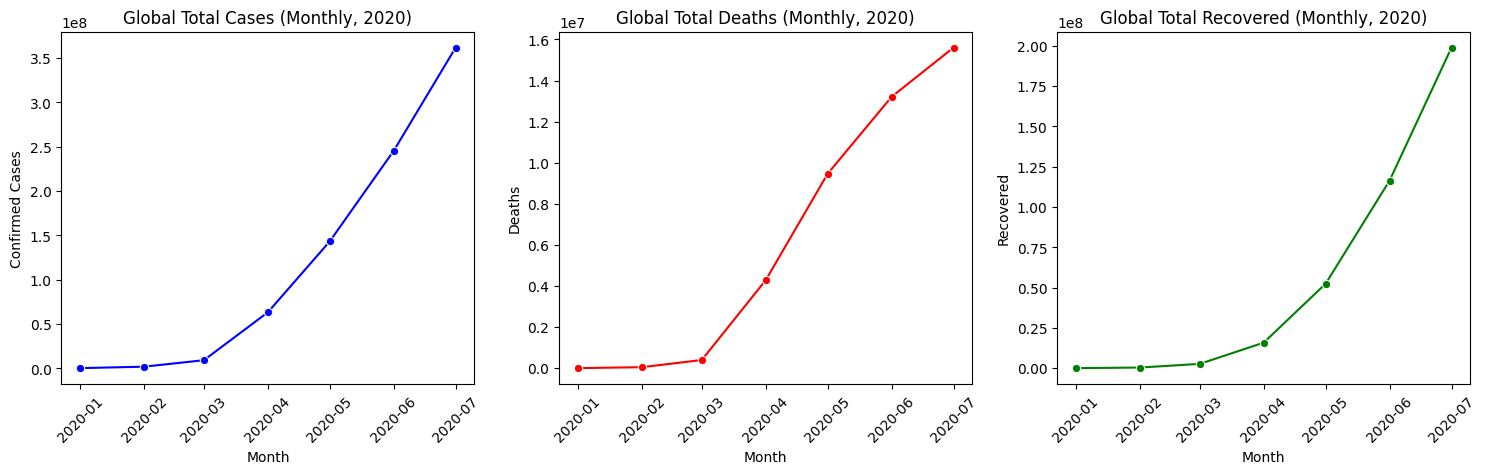

In [57]:
# Ensure Date column is datetime
full_grouped_cleaned["Date"] = pd.to_datetime(full_grouped_cleaned["Date"])

# Group by Month
monthly_2020 = full_grouped_cleaned.groupby(full_grouped_cleaned["Date"].dt.to_period("M"))[["Confirmed", "Deaths", "Recovered"]].sum().reset_index()
monthly_2020["Date"] = monthly_2020["Date"].dt.to_timestamp()  # convert Period back to Timestamp

plt.figure(figsize=(15,5))

# Total Cases
plt.subplot(1,3,1)
sns.lineplot(data=monthly_2020, x="Date", y="Confirmed", marker="o", color="blue")
plt.title("Global Total Cases (Monthly, 2020)")
plt.xlabel("Month")
plt.ylabel("Confirmed Cases")
plt.xticks(rotation=45)

# Total Deaths
plt.subplot(1,3,2)
sns.lineplot(data=monthly_2020, x="Date", y="Deaths", marker="o", color="red")
plt.title("Global Total Deaths (Monthly, 2020)")
plt.xlabel("Month")
plt.ylabel("Deaths")
plt.xticks(rotation=45)

# Total Recovered
plt.subplot(1,3,3)
sns.lineplot(data=monthly_2020, x="Date", y="Recovered", marker="o", color="green")
plt.title("Global Total Recovered (Monthly, 2020)")
plt.xlabel("Month")
plt.ylabel("Recovered")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


C:\Users\QaiatY store\AppData\Local\Temp\ipykernel_6844\91623231.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\QaiatY store\AppData\Local\Temp\ipykernel_6844\91623231.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\QaiatY store\AppData\Local\Temp\ipykernel_6844\91623231.py:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




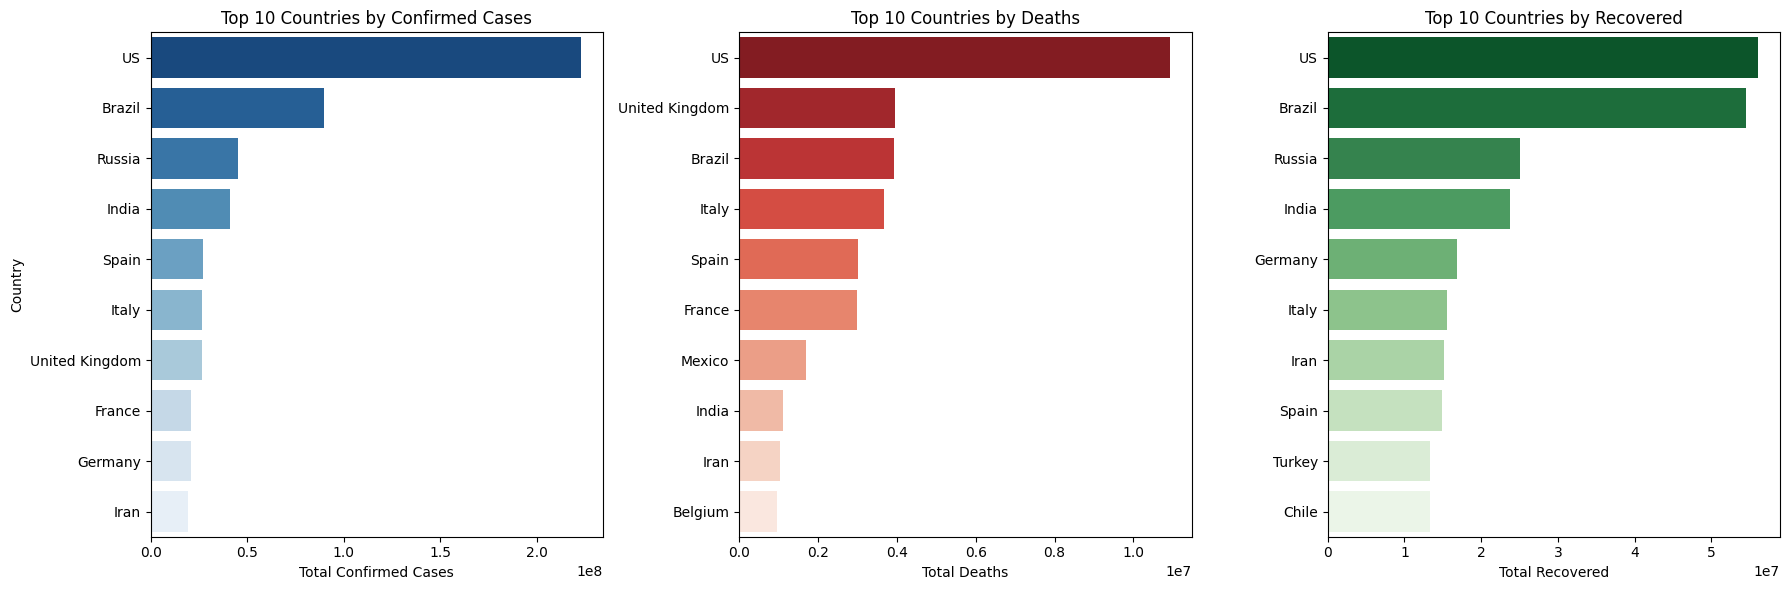

In [58]:
# Group by Country for totals
country_totals = full_grouped_cleaned.groupby("Country/Region")[["Confirmed", "Deaths", "Recovered"]].sum().reset_index()

# Top 10 by Confirmed, Deaths, Recovered
top10_confirmed = country_totals.nlargest(10, "Confirmed")
top10_deaths = country_totals.nlargest(10, "Deaths")
top10_recovered = country_totals.nlargest(10, "Recovered")

# Plot subplots
plt.figure(figsize=(18,6))

# Top 10 Confirmed
plt.subplot(1,3,1)
sns.barplot(data=top10_confirmed, x="Confirmed", y="Country/Region", palette="Blues_r")
plt.title("Top 10 Countries by Confirmed Cases")
plt.xlabel("Total Confirmed Cases")
plt.ylabel("Country")

# Top 10 Deaths
plt.subplot(1,3,2)
sns.barplot(data=top10_deaths, x="Deaths", y="Country/Region", palette="Reds_r")
plt.title("Top 10 Countries by Deaths")
plt.xlabel("Total Deaths")
plt.ylabel("")

# Top 10 Recovered
plt.subplot(1,3,3)
sns.barplot(data=top10_recovered, x="Recovered", y="Country/Region", palette="Greens_r")
plt.title("Top 10 Countries by Recovered")
plt.xlabel("Total Recovered")
plt.ylabel("")

plt.tight_layout()
plt.show()


**Insight**
 **Regional Disparity**  
   The Americas and Europe have dramatically higher confirmed COVID-19 cases than all other regions combined, making them the pandemic’s 
   South-East Asia, Eastern Mediterranean, Africa, and the Western Pacific have significantly fewer cases.

**Business Question:** 
Where should a global health organization with limited resources focus to maximize impact?  

**Answer:** 
Prioritize the Americas and Europe, as they bear the highest case burden and require urgent intervention.

**Recommendation**  
   Direct resources to these hotspots, including PPE, ventilators, testing kits, expert personnel, and financial aid to strengthen healthcare systems and contain outbreaks effectively.


##  Bivariate Analysis

This section examines relationships between two variables in our COVID-19 dataset.

The **Case Fatality Rate (CFR)** is a measure used to understand the severity of a disease.

CFR is (deaths/cases) %

C:\Users\QaiatY store\AppData\Local\Temp\ipykernel_6844\186214180.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




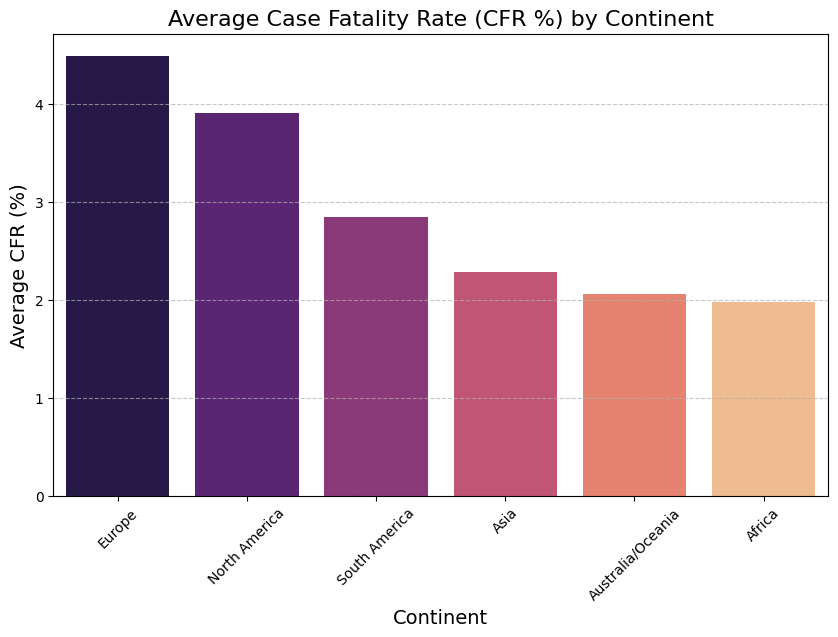

In [65]:
# Calculate CFR (%) for each country
worldometer_data_cleaned["CFR(%)"] = (worldometer_data_cleaned["TotalDeaths"] / worldometer_data_cleaned["TotalCases"]) * 100

# Group by continent and calculate mean CFR(%)
continent_cfr_percent = worldometer_data_cleaned.groupby("Continent")["CFR(%)"].mean().sort_values(ascending=False)

# Plot CFR(%) by continent
plt.figure(figsize=(10, 6))
sns.barplot(x=continent_cfr_percent.index, y=continent_cfr_percent.values, palette="magma")
plt.title("Average Case Fatality Rate (CFR %) by Continent", fontsize=16)
plt.xlabel("Continent", fontsize=14)
plt.ylabel("Average CFR (%)", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


### Insight

**Europe and North America: Higher CFRs may be due to older populations, high comorbidities, or initial healthcare system overload during pandemic peaks.**

**Africa: Lower CFR may reflect under-reporting of deaths and cases or younger demographics.**

**Asia & Australia/Oceania: Moderate CFRs suggest effective healthcare systems but varied outcomes across countries.**


### Business Question
Which continent has the highest average Case Fatality Rate (CFR %) and what does this indicate about healthcare performance and pandemic management?

### Ans:
According to the chart, Europe has the highest average CFR (~4.5%), followed by North America (~3.9%) and South America (~2.9%). Africa has the lowest average CFR (~2%).

High CFR indicates that a greater proportion of confirmed COVID-19 cases result in death, which may reflect healthcare system strain, delays in case detection, or demographic factors such as older populations. Lower CFR suggests better case management or differences in reporting.

### Recommendation

For continents with high CFR, strengthen early case detection and hospital capacity, and ensure rapid access to care for severe cases.

Standardize data reporting and case definitions to ensure CFR comparisons are accurate.

Share successful pandemic response strategies from low CFR regions globally, focusing on testing, early intervention, and healthcare capacity.

###  Segmented / Grouped Analysis  
###  World Heatmap — Case Fatality Rate (CFR)

We will calculate CFR (%) for each country and visualize it globally using a choropleth map.


In [66]:
# Calculate CFR (%) for each country
worldometer_data_cleaned["CFR(%)"] = (worldometer_data_cleaned["TotalDeaths"] / worldometer_data_cleaned["TotalCases"]) * 100

# Choropleth map
fig = px.choropleth(worldometer_data_cleaned,
                    locations="Country/Region",
                    locationmode="country names",
                    color="CFR(%)",
                    hover_name="Country/Region",
                    color_continuous_scale="Reds",
                    title="Global Case Fatality Rate (CFR %)",
                    labels={"CFR(%)": "CFR (%)"})
fig.update_layout(geo=dict(showframe=False, showcoastlines=True))
fig.show()

C:\Users\QaiatY store\AppData\Local\Temp\ipykernel_6844\1620581103.py:5: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



###  Testing Effectiveness by Continent
We analyze whether higher testing rates correlate with better control of cases.

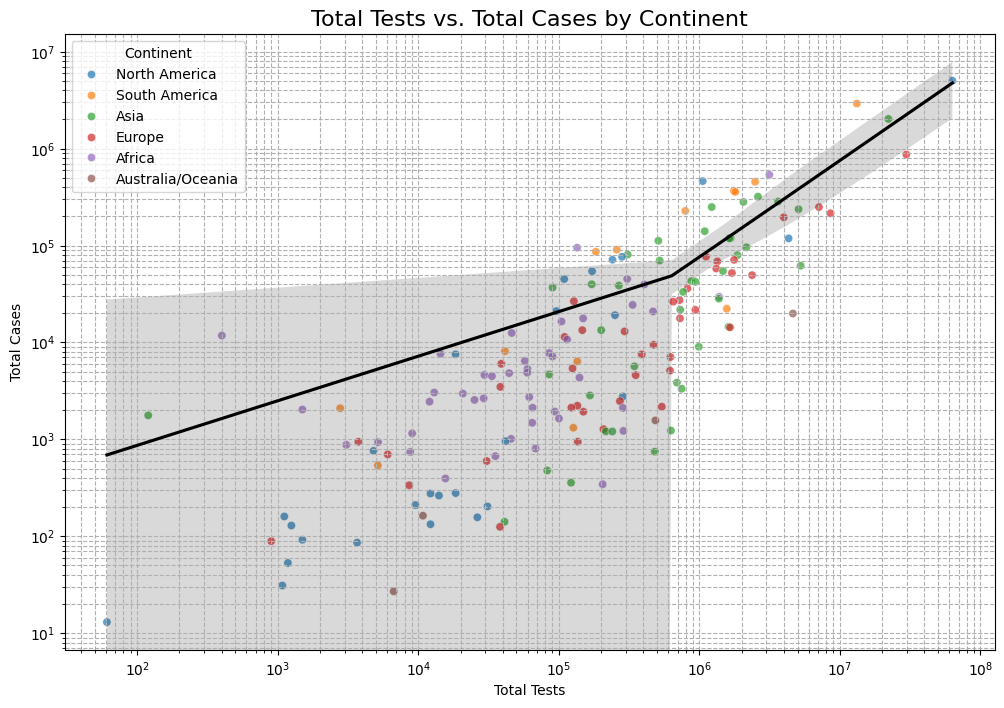

In [67]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=worldometer_data_cleaned, x="TotalTests", y="TotalCases", hue="Continent", alpha=0.7)
sns.regplot(data=worldometer_data_cleaned, x="TotalTests", y="TotalCases", scatter=False, color="black")
plt.title("Total Tests vs. Total Cases by Continent", fontsize=16)
plt.xlabel("Total Tests")
plt.ylabel("Total Cases")
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", linestyle="--")
plt.show()

### Insight

**Testing correlates with case detection, especially in Europe and North America. Low testing rates in Africa hinder outbreak detection.**



### Business Question
How effective was testing in controlling spread across continents?

### Ans:
Observation: In continents like Europe and North America, higher testing correlates with higher detected cases (positive correlation).

Interpretation: This suggests testing uncovers cases rather than preventing them directly. However, early and widespread testing helps control spread later by isolating cases sooner.

Contrast: In Africa, testing rates are lower, so case detection is low, meaning spread control is less effective due to under-testing.

### Recommendation

- Expand testing in under-tested regions, paired with contact tracing.  
- Use testing strategically to detect outbreaks early.

###  Trends in New Cases & Deaths Over Time
We observe global trends to identify peaks and declines in the pandemic.

C:\Users\QaiatY store\AppData\Local\Temp\ipykernel_6844\3322608980.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



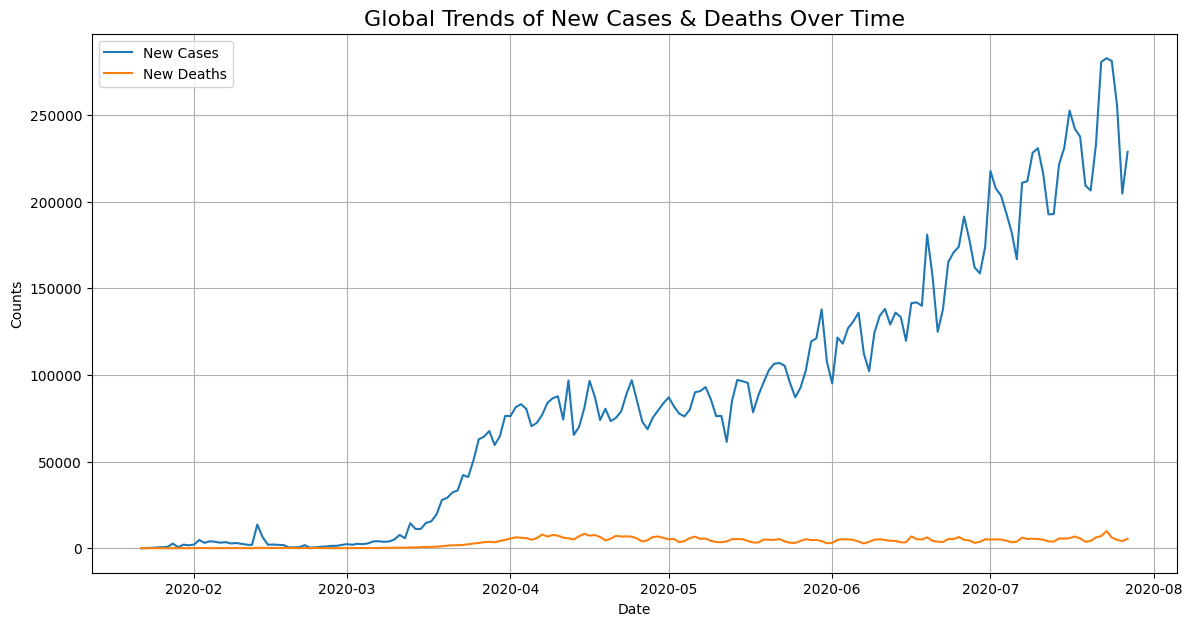

In [68]:
# Convert date
full_grouped_cleaned["Date"] = pd.to_datetime(full_grouped_cleaned["Date"])

# Aggregate global data by date
global_time = full_grouped_cleaned.groupby("Date")[["New cases", "New deaths"]].sum().reset_index()

# Plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=global_time, x="Date", y="New cases", label="New Cases")
sns.lineplot(data=global_time, x="Date", y="New deaths", label="New Deaths")
plt.title("Global Trends of New Cases & Deaths Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Counts")
plt.legend()
plt.grid(True)
plt.show()




### Business Question
What trends can be observed in new cases and deaths over time?

### Insight & Ans:
Trend: Globally, COVID-19 shows waves — peaks of cases followed by declines. Peaks often correspond to variants or reduced control measures.

### Recommendation

Adapt Public Health Measures – Use real-time data to adjust restrictions, mask mandates, and crowd limits during peak waves.

Accelerate Vaccination & Boosters – Ensure timely vaccination campaigns, especially before predicted waves or variant emergence.

###  Recovery Rate Comparison by Continent
Recovery rate is calculated as:
Recovery Rate = (Total Recovered \ Total Cases )*100


C:\Users\QaiatY store\AppData\Local\Temp\ipykernel_6844\3902769472.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




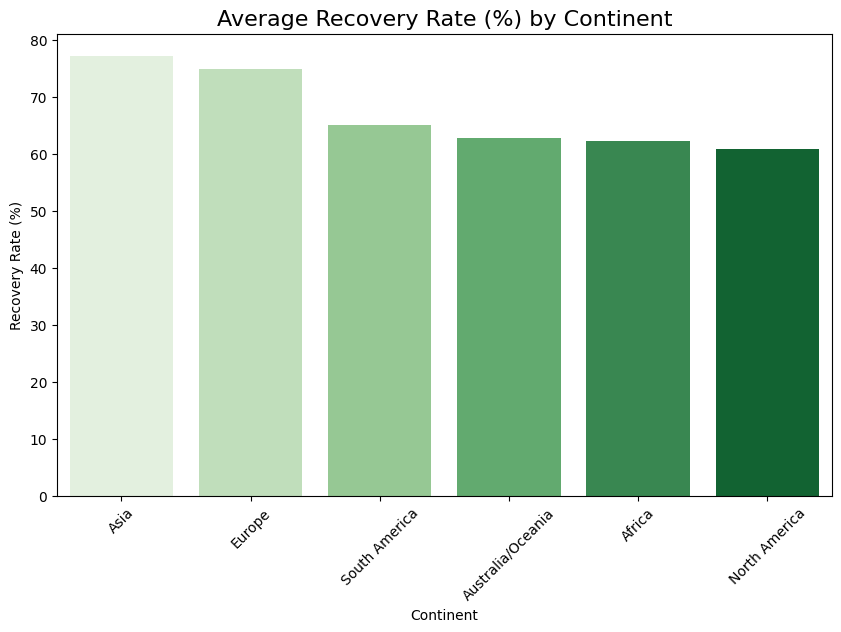

In [69]:
worldometer_data_cleaned["RecoveryRate(%)"] = (worldometer_data_cleaned["TotalRecovered"] / worldometer_data_cleaned["TotalCases"]) * 100

continent_recovery = worldometer_data_cleaned.groupby("Continent")["RecoveryRate(%)"].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=continent_recovery.index, y=continent_recovery.values, palette="Greens")
plt.title("Average Recovery Rate (%) by Continent", fontsize=16)
plt.xlabel("Continent")
plt.ylabel("Recovery Rate (%)")
plt.xticks(rotation=45)
plt.show()


### Business Question
Which continent showed the fastest recovery rate compared to cases?

### Insight & Ans:
Recovery rate = total recovered / total cases × 100.

Highest recovery rate: Asia   above 75%.

Lowest recovery rate: Africa & North America (Mexcico) (~60%), likely due to under-reporting and limited healthcare access.

### Recommendation
Low recovery rate regions should strengthen clinical treatment capacity and healthcare access.

Share best practices from high recovery rate continents to improve global response.